,Unnamed: 0,bucket,cpu,gcl,population,gcl delta,cpu normal
count,11901.000000,11901.000000,11901.000000,1.190100e+04,11901.000000,11900.000000,11400.000000
mean,5950.000000,9914.671624,13.286149,6.975531e+06,7.894883,3.893613,6.147625
std,3435.667111,178.887261,34.426377,1.322769e+04,0.319598,3.499238,4.369125
min,0.000000,9068.000000,2.017894,6.956309e+06,6.000000,0.000000,2.017894
25%,2975.000000,9822.000000,4.219937,6.962443e+06,8.000000,1.000000,4.149668
50%,5950.000000,10000.000000,5.101379,6.977182e+06,8.000000,3.000000,5.040439
75%,8925.000000,10000.000000,6.985194,6.985451e+06,8.000000,6.000000,6.580381
max,11900.000000,11000.000000,234.507708,7.002643e+06,8.000000,23.000000,63.222100


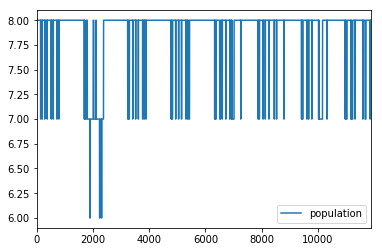

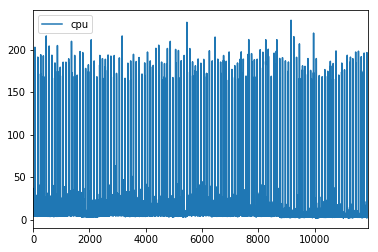

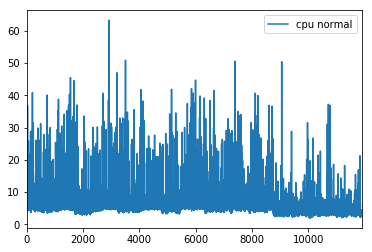

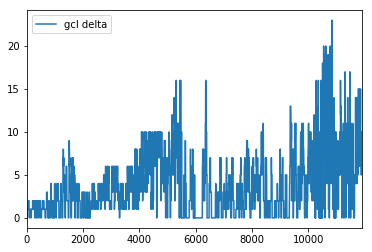

In [16]:
import fetch_stats as fs
import pandas as pd
import matplotlib.pyplot as plt

REFRESH_DATA = False

if REFRESH_DATA:
    reports = fs.main()
    reports = [
        {
            **x,
            'gcl': x['gcl']['progress']
        }
        for x in reports
    ]
    df = pd.DataFrame(reports)
    df.to_csv("reports.csv")
else:
    df = pd.read_csv("reports.csv")
    
df['gcl delta'] = df['gcl'].diff().shift(-1)
df['cpu normal'] = df[df['cpu'] < 80]["cpu"]

df.plot(y="population")
df.plot(y="cpu")
df.plot(y="cpu normal")
df.plot(y="gcl delta")
df.describe()